In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
ei_df = pd.read_csv("./data/expected_improvement_baseline.csv")
me_df = pd.concat([pd.read_csv("./data/no_fidelity_max_value_entropy.csv"), pd.read_csv("./data/no_fidelity_max_value_entropy_synthetic.csv")])
kg_df = pd.concat([pd.read_csv("./data/no_fidelity_knowledge_gradient.csv"), pd.read_csv("./data/no_fidelity_knowledge_gradient_synthetic.csv")])

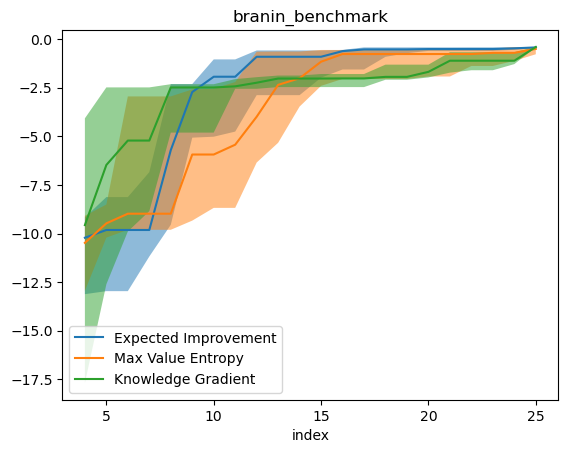

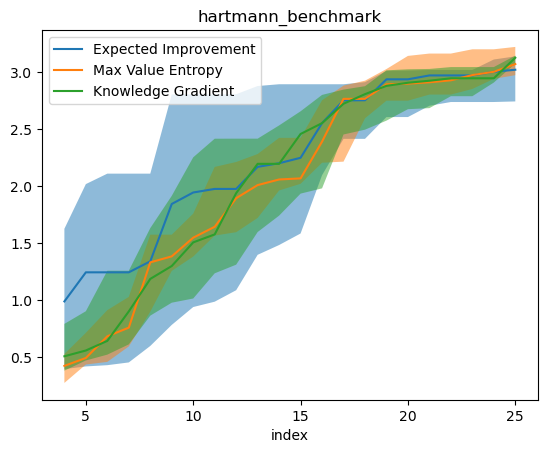

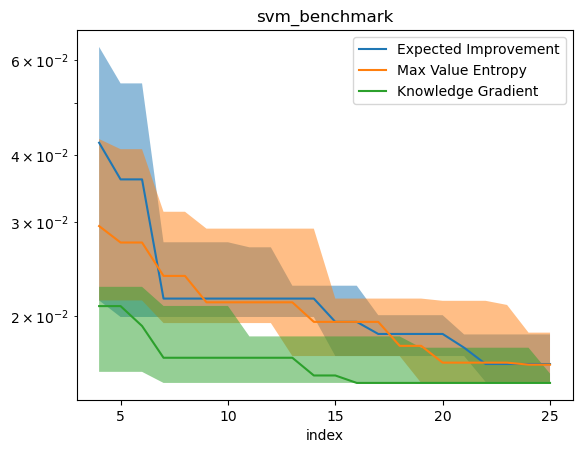

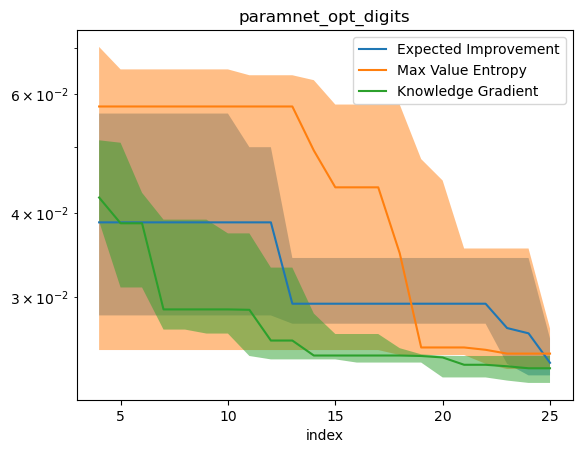

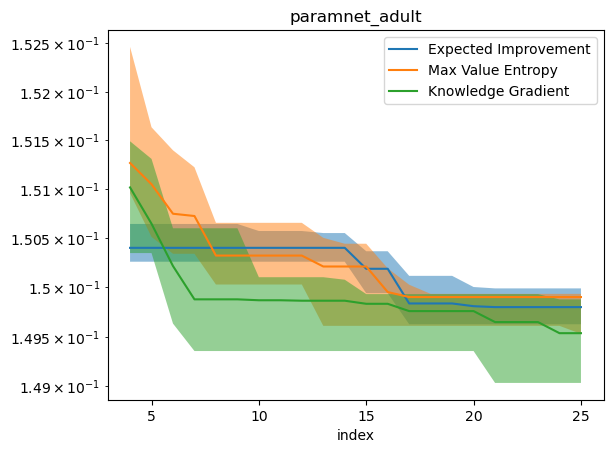

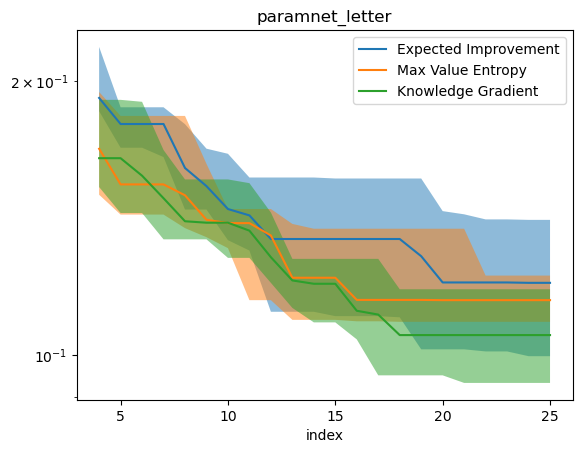

In [44]:
for b in ei_df.benchmark.unique():
    fig, ax = plt.subplots()
    for df, name in [(ei_df, "Expected Improvement"), (me_df, "Max Value Entropy"), (kg_df, "Knowledge Gradient")]:
        if "bran" in b or "hart" in b:
            mid = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummax().median(axis=1)
            upper = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummax().quantile(0.75, axis=1)
            lower = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummax().quantile(0.25, axis=1)

            mid[4:].plot(label=name)
            plt.fill_between(upper[4:].index, lower[4:], upper[4:], alpha=0.5)
            

        else:
            mid = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummin().median(axis=1)
            upper = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummin().quantile(0.75, axis=1)
            lower = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummin().quantile(0.25, axis=1)

            mid[4:].plot(label=name)
            plt.fill_between(upper[4:].index, lower[4:], upper[4:], alpha=0.5)
            ax.set_yscale('log')

    ax.legend()
    ax.set_title(b)

In [4]:

ei_df.groupby(["benchmark", "index"])["function_value"].median()

benchmark         index
branin_benchmark  0        -96.261813
                  1        -99.934740
                  2        -22.267050
                  3        -14.230469
                  4       -107.444518
                              ...    
svm_benchmark     21         0.021593
                  22         0.021593
                  23         0.029445
                  24         0.026742
                  25         0.016315
Name: function_value, Length: 156, dtype: float64

In [4]:
ei_df = pd.read_csv("./data/expected_improvement_baseline.csv")
mf_me_df = pd.concat([pd.read_csv("./data/mf_max_value_entropy.csv"), pd.read_csv("./data/mf_max_value_entropy_synthetic.csv")])
#kg_df = pd.concat([pd.read_csv("./data/mf_knowledge_gradient.csv"), pd.read_csv("./data/mf_knowledge_gradient_synthetic.csv")])

In [ ]:
for b in ei_df.benchmark.unique():
    fig, ax = plt.subplots()
    for df, name in [(ei_df, "Expected Improvement"), (mf_me_df, "Multi-Fidelity MVES")]:
        if "bran" in b or "hart" in b:
            mid = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummax().median(axis=1)
            upper = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummax().quantile(0.75, axis=1)
            lower = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummax().quantile(0.25, axis=1)

            mid[4:].plot(label=name)
            plt.fill_between(upper[4:].index, lower[4:], upper[4:], alpha=0.5)
            

        else:
            mid = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummin().median(axis=1)
            upper = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummin().quantile(0.75, axis=1)
            lower = df.loc[df.benchmark==b].pivot(index="index", columns="run", values="function_value").cummin().quantile(0.25, axis=1)

            mid[4:].plot(label=name)
            plt.fill_between(upper[4:].index, lower[4:], upper[4:], alpha=0.5)
            ax.set_yscale('log')

    ax.legend()
    ax.set_title(b)

In [ ]:
from bayesopt_playground.benchmarks import paramnet_opt_digits, generate_optimization_task

objective_function, bounds = generate_optimization_task(paramnet_opt_digits)

In [16]:
df.loc[df.benchmark=="paramnet_opt_digits"][['0', '1', '2', '3', '4', '5']].values

array([[ 1.80506073e-02,  2.24753186e-01, -3.19676888e+00,
        -4.60728109e+00,  6.46632731e-01,  2.00000000e+00],
       [ 4.25451670e-01,  3.52531550e-01, -8.45605697e-01,
        -3.40855573e+00,  9.48783439e-02,  5.00000000e+00],
       [ 2.80955274e-01,  5.84129700e-02, -2.15370684e+00,
        -5.41454572e+00,  2.73226904e-01,  1.00000000e+01],
       ...,
       [ 4.42475822e-01,  1.46774455e-01, -3.68830191e+00,
        -2.77425375e+00,  8.11760160e-01,  1.00000000e+00],
       [ 4.42100917e-01,  1.46599627e-01, -3.68895763e+00,
        -2.77164888e+00,  8.11341636e-01,  3.93122786e+00],
       [ 4.10865319e-01,  1.34815274e-01, -3.62255932e+00,
        -2.61886170e+00,  7.53936684e-01,  2.70000000e+01]])

In [6]:
df = mf_me_df
df.loc[df.benchmark=="paramnet_opt_digits"].pivot(index="index", columns="run", values="function_value")

run,0,1,2,3,4,5,6,7
index,,,,,,,,
0,0.873130,0.102655,0.890909,0.539340,0.102574,0.794851,0.745696,0.820595
1,0.198874,0.882864,0.225261,0.278600,0.787128,0.347788,0.045937,0.028560
2,0.886404,0.091231,0.702977,0.861062,0.035961,0.895253,0.715286,0.815768
3,0.160257,0.765567,0.047224,0.042317,0.882703,0.051730,0.112872,0.347627
4,0.024698,0.733870,0.219549,0.024216,0.865004,0.038536,0.501207,0.295575
5,0.871038,0.099115,0.886967,0.512872,0.090265,0.744730,0.722285,0.795414
6,0.277635,0.888254,0.272003,0.292438,0.798471,0.356637,0.046259,0.028560
7,0.886404,0.091231,0.702977,0.861062,0.035961,0.895253,0.715286,0.815768
8,0.154706,0.689220,0.043202,0.041673,0.882220,0.047224,0.107723,0.325181
